In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/hw2/bestsellers with categories (1).csv')

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
# Про скільки книг зберігає дані датасет? - 550

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [7]:
for col in df.columns:
  empty_values = df[col].isnull().sum()
  if empty_values > 0:
    print(col, ' : ', empty_values)

# Чи є в якихось змінних пропуски? - Ні

In [8]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [9]:
# Які є унікальні жанри? - ['Non Fiction', 'Fiction']

<Axes: xlabel='price', ylabel='Count'>

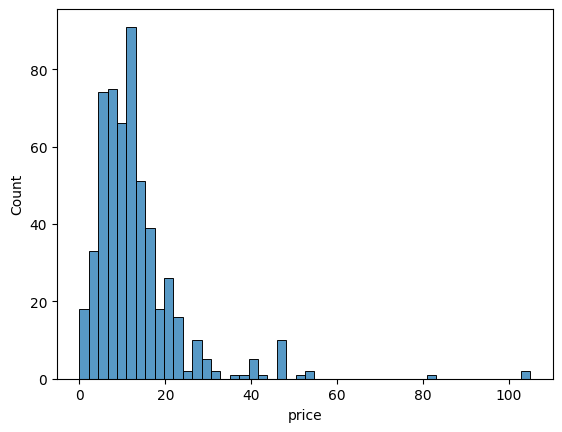

In [10]:
sns.histplot(data=df, x='price')

In [11]:
df['price'].describe()

,price
count,550.000000
mean,13.100000
std,10.842262
min,0.000000
25%,7.000000
50%,11.000000
75%,16.000000
max,105.000000


In [12]:
# Максимальна ціна? - 105
# Мінімальна ціна? - 0
# Середня ціна? - 13
# Медіанна ціна? - 11

In [13]:
df.head()

max_user_rating = df['user_rating'].max()
max_user_rating
# Який рейтинг у датасеті найвищий? - 4.9

4.9

In [14]:
filtered_df = df[df['user_rating'] == max_user_rating]
filtered_df.shape
# Скільки книг мають такий рейтинг? - 52

(52, 7)

In [15]:
df[df['reviews'] == df['reviews'].max()]


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [16]:
df_2015_year = df[df['year'] == 2015]
df_2015_year[df_2015_year['price'] == df_2015_year['price'].max()]


# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? - Publication Manual of the American Psychologic...

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [17]:
df_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
df_2010_fiction.shape

(20, 7)

In [18]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &) - 2010

In [19]:
df_2010_11_top = df[df['year'].isin([2010, 2011]) & (df['user_rating'] == 4.9)]
df_2010_11_top

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? - 1

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [20]:
df_2015 = df[(df['year'] == 2015) & (df['price'] < 8)]
df_2015.sort_values('price')

# Яка книга остання у відсортованому списку? - Old School (Diary of a Wimpy Kid #10)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


In [21]:
agg_df = df[['price', 'genre']].groupby(['genre']).agg({ 'price': ['max', 'min']})
agg_df

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [22]:
# Максимальна ціна для жанру Fiction - 82
# Мінімальна ціна для жанру Fiction - 0
# Максимальна ціна для жанру Non Fiction - 105
# Мінімальна ціна для жанру Non Fiction - 0

In [36]:
df_author_books_count = df[['author', 'name']].groupby('author').agg(count=('name', 'count'))
df_author_books_count

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [24]:
df_author_books_count.shape

# Якої розмірності вийшла таблиця? - 248


(248, 2)

In [25]:
max_books = df_author_books_count['count'].max()

author_max_books = df_author_books_count[df_author_books_count['count'] == max_books]

author_max_books
# Який автор має найбільше книг? - Jeff Kinney
# Скільки книг цього автора? - 12

,author,count
120,Jeff Kinney,12


In [35]:
df_author_rating = (
    df[['author', 'user_rating']]
      .groupby('author')
      .agg(mean_rating=('user_rating', 'mean'))
)

df_author_rating

,mean_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [34]:

min_user_raiting = df_author_rating['mean_rating'].min()

df_author_rating[df_author_rating['mean_rating'] == min_user_raiting]

# У якого автора середній рейтинг мінімальний - Donna Tartt
# Який у цього автора середній рейтинг? - 3.9

,mean_rating
author,
Donna Tartt,3.9


In [37]:
df_author_rating_books = pd.concat([df_author_rating, df_author_books_count], axis=1)
df_author_rating_books

,mean_rating,count
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


In [38]:
sorted_authors = df_author_rating_books.sort_values(by=['mean_rating', 'count']).reset_index()

sorted_authors

# first_author = sorted_authors.loc[0]

# Який автор перший у списку? - Donna Tartt


,author,mean_rating,count
0,Donna Tartt,3.9,2
1,Muriel Barbery,4.0,1
2,Gillian Flynn,4.0,3
3,Gallup,4.0,9
4,Chris Cleave,4.1,1
...,...,...,...
243,Sherri Duskey Rinker,4.9,2
244,Emily Winfield Martin,4.9,4
245,Sarah Young,4.9,6
246,Dav Pilkey,4.9,7


[Text(0.5, 1.0, 'Распределение рейтингов пользователей по жанрам')]

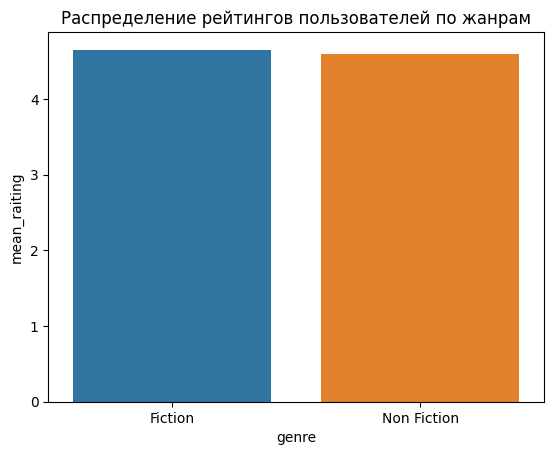

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


df_genre_user_raiting = df[['genre', 'user_rating']].groupby('genre').agg(mean_raiting=('user_rating', 'mean'))

df_genre_user_raiting
sns.barplot(data=df_genre_user_raiting, x='genre', y='mean_raiting', hue='genre').set(title='Распределение рейтингов пользователей по жанрам')

[Text(0.5, 1.0, 'Связь между ценой книги и количеством отзывов')]

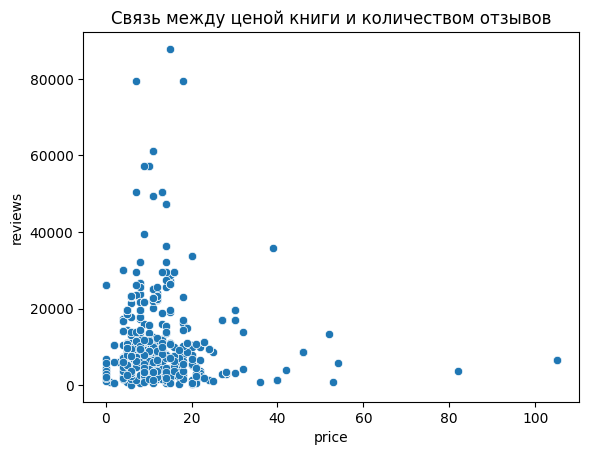

In [53]:
sns.scatterplot(data=df, x='price', y='reviews').set(title='Связь между ценой книги и количеством отзывов')


In [ ]:
sns.scatterplot(data=df, x='price', y='reviews').set(title='Связь между ценой книги и количеством отзывов')


[Text(0.5, 1.0, 'ТОП-5 авторов по количеству отзывов')]

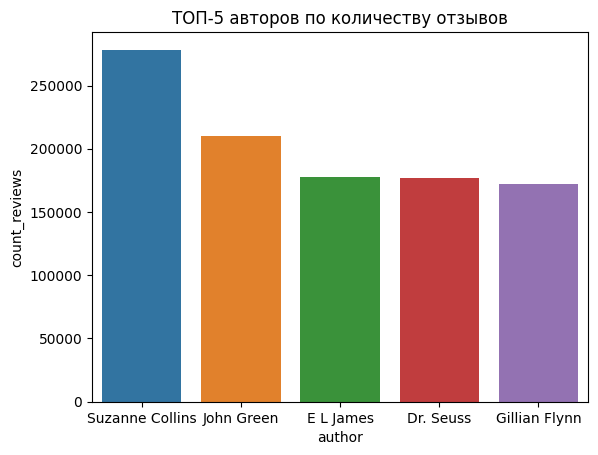

In [61]:
df_author_reviews = df[['author', 'reviews']].groupby(by='author').agg(count_reviews=('reviews', 'sum')).sort_values('count_reviews', ascending=False)

df_author_reviews

sns.barplot(data=df_author_reviews.head(), x='author', y='count_reviews', hue='author').set(title='ТОП-5 авторов по количеству отзывов')



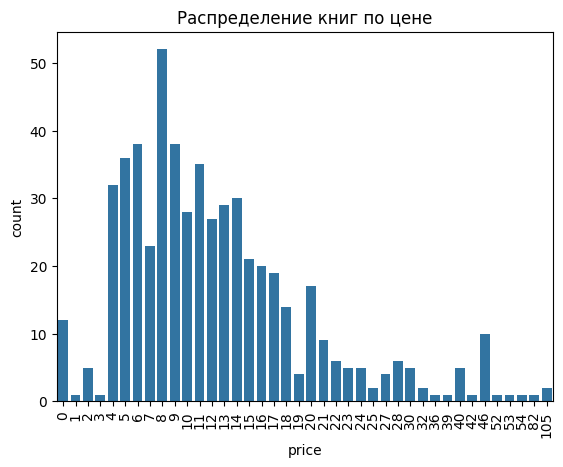

In [72]:
df_price_books = df[['price', 'author']].groupby(by='price').agg(count=('author', 'count'))
ax = sns.barplot(data=df_price_books, x='price', y='count')
ax.set(title='Распределение книг по цене')
ax.tick_params(axis='x', rotation=90)

<Axes: xlabel='user_rating', ylabel='reviews'>

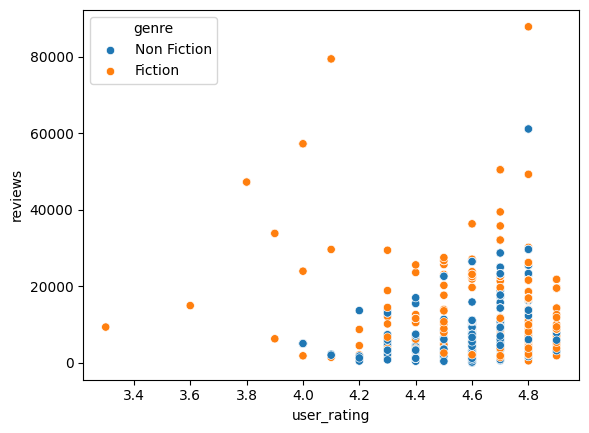

In [74]:
df_user_rating_reviews = df

sns.scatterplot(data=df, x='user_rating', y='reviews', hue='genre')